In [71]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

cwd = os.getcwd()

data_dir = os.path.join(os.path.dirname(cwd), "data", "raw")

filename = os.path.join(data_dir, "train_sample.csv")

In [72]:
# Data Import
data = pd.read_csv(filename)
data = data.rename(columns={"Unnamed: 0": "ID"})
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,4985,19,1059,0,57,57,0,3,8,3,0,21,15730.0,1
1,43523,34,2015,0,46,46,0,3,11,4,0,2,12892.0,0
2,32846,1,45,1,32,30,1,3,15,3,1,16,10500.0,0
3,16177,11,3638,1,30,30,0,0,14,3,0,3,11628.0,1
4,4057,0,4746,0,52,52,0,1,15,3,0,16,12660.0,0


   Count  Normalized
0  36748       76.02
1  11589       23.98


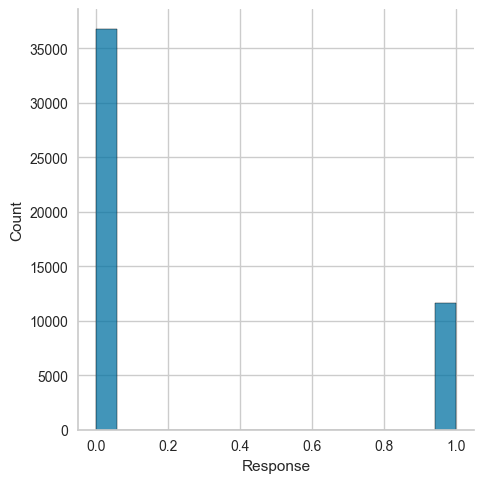

In [73]:
# Data Exploration

perc = data["Response"].value_counts(normalize=True).to_frame()
resp_count = data["Response"].value_counts().to_frame()
resp_count["Normalized"] = round(perc["Response"] * 100, 2)
resp_count = resp_count.rename(columns={"Response":"Count"})

print(resp_count)

sns.displot(data, x="Response")

Text(0.5, 1.0, 'Correlation Heatmap')

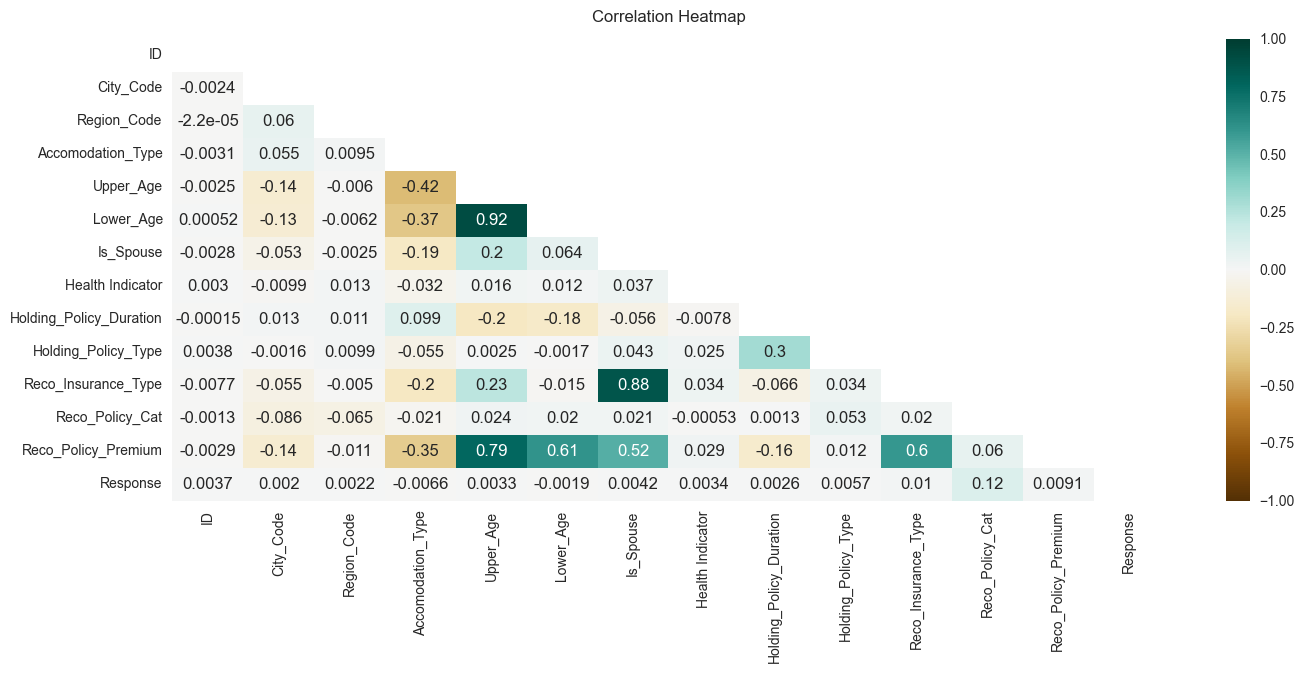

In [74]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
h = sns.heatmap(data.corr(), vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
h.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# pd.plotting.scatter_matrix(data, alpha=0.1)

In [75]:
# Setup experiment
# Experiment one: Normalize
# Experiment two: Above + fix imblanace with SMOTE
# Experiment three: Above + poly feature extraction 

params = {
    "target":"Response",
    "session_id":123,
    "normalize": True,
    "normalize_method": "zscore",
    "fix_imbalance": True,
    "fix_imbalance_method": "SMOTE",
    "polynomial_features":True,
    "log_experiment": True,
    "experiment_name": "Class_Imbalance_No_Poly"
}

exp = ClassificationExperiment()

s = exp.setup(data, **params)
print(s)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(48337, 14)"
4,Transformed data shape,"(65948, 105)"
5,Transformed train set shape,"(51446, 105)"
6,Transformed test set shape,"(14502, 105)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [76]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [81]:
# compare models
top = exp.compare_models(sort = 'F1') #n_select = 5

# tune models
best = exp.tune_model(top, optimize='Accuracy', n_iter = 50, search_library='scikit-optimize', search_algorithm='bayesian')
# tuned_top5 = [exp.tune_model(i) for i in top5]

# ensemble models
# bagged_model = exp.ensemble_model(tuned_model)

# stack models
# stacker = exp.stack_models(estimator_list = top5)

# automl 
# best = exp.automl(optimize = 'F1')
print(best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:53:19
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4453,0.0000,0.7291,0.2632,0.3868,0.0528,0.0767
1,0.4507,0.0000,0.7180,0.2634,0.3855,0.0530,0.0756
2,0.4601,0.0000,0.7078,0.2652,0.3859,0.0572,0.0798
3,0.4418,0.0000,0.6893,0.2546,0.3718,0.0335,0.0474
4,0.4542,0.0000,0.7004,0.2615,0.3808,0.0489,0.0685
5,0.4505,0.0000,0.7090,0.2616,0.3822,0.0492,0.0698
6,0.4393,0.0000,0.6979,0.2552,0.3737,0.0349,0.0500
7,0.4531,0.0000,0.7398,0.2680,0.3934,0.0640,0.0926
8,0.4564,0.0000,0.7361,0.2687,0.3937,0.0654,0.0938


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [82]:
results = exp.pull()
print(results)

      Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.4453  0.0  0.7291  0.2632  0.3868  0.0528  0.0767
1       0.4507  0.0  0.7180  0.2634  0.3855  0.0530  0.0756
2       0.4601  0.0  0.7078  0.2652  0.3859  0.0572  0.0798
3       0.4418  0.0  0.6893  0.2546  0.3718  0.0335  0.0474
4       0.4542  0.0  0.7004  0.2615  0.3808  0.0489  0.0685
5       0.4505  0.0  0.7090  0.2616  0.3822  0.0492  0.0698
6       0.4393  0.0  0.6979  0.2552  0.3737  0.0349  0.0500
7       0.4531  0.0  0.7398  0.2680  0.3934  0.0640  0.0926
8       0.4564  0.0  0.7361  0.2687  0.3937  0.0654  0.0938
9       0.4520  0.0  0.7287  0.2656  0.3893  0.0585  0.0841
Mean    0.4503  0.0  0.7156  0.2627  0.3843  0.0517  0.0738
Std     0.0062  0.0  0.0165  0.0045  0.0070  0.0102  0.0149


In [83]:
# predict on test set
holdout_pred = exp.predict_model(best)

# show predictions df
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4459,0.5496,0.7486,0.2666,0.3932,0.0612,0.0902


,ID,City_Code,Region_Code,Accomodation_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,prediction_label
20524,12562,18,3965,1,53,19,0,3,9,2,1,15,27148.800781,1,1
26895,3649,0,704,0,64,64,0,0,15,3,0,18,18030.000000,0,0
13398,49326,1,2401,1,69,69,0,0,0,1,0,16,20832.000000,0,1
29490,26455,14,331,0,25,25,0,1,15,3,0,16,11826.000000,1,1
42275,33377,30,7,1,49,49,0,4,7,1,0,2,10760.000000,0,0


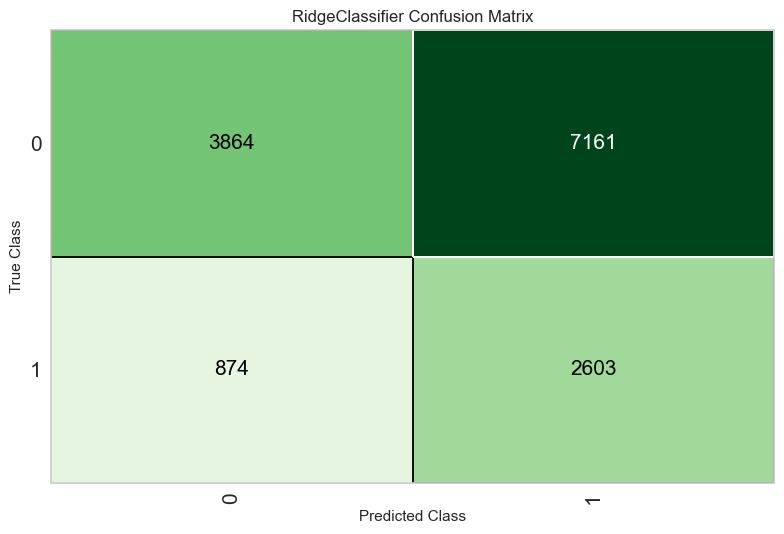

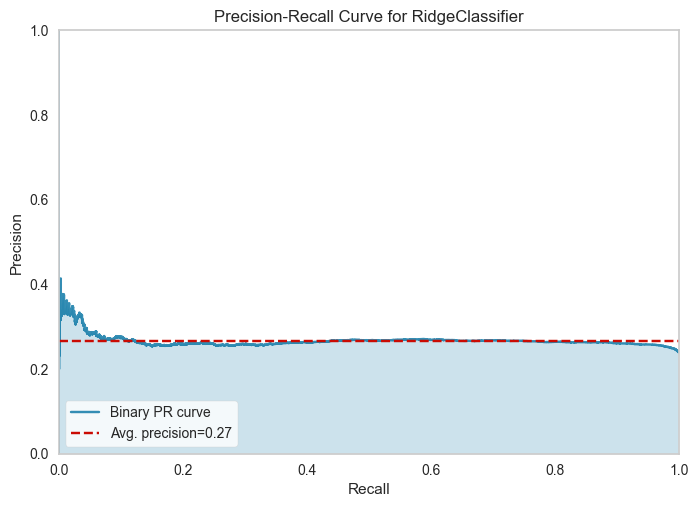

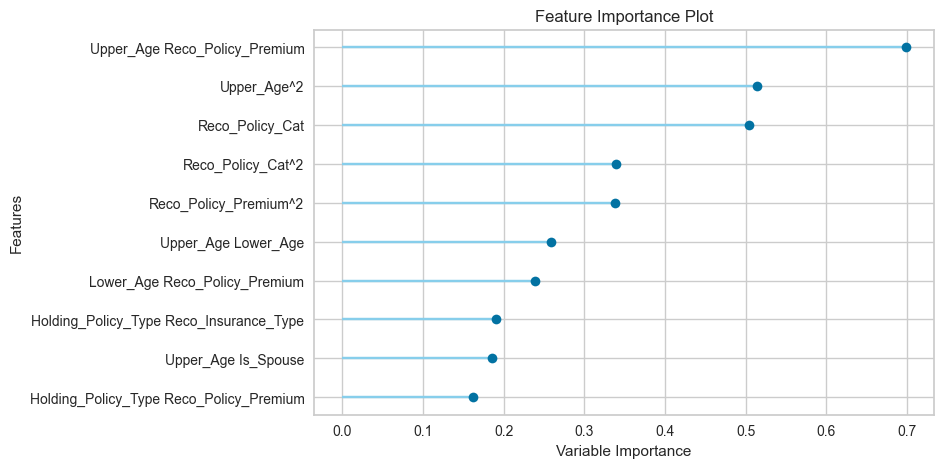

In [84]:
# Analyze models

exp.plot_model(best, plot="confusion_matrix", use_train_data = True)
exp.plot_model(best, plot="pr")

exp.plot_model(best, plot = 'feature')

In [85]:
# Start mlflow
!mlflow ui

[2023-04-13 08:55:22 -0400] [4690] [INFO] Starting gunicorn 20.1.0
[2023-04-13 08:55:22 -0400] [4690] [INFO] Listening at: http://127.0.0.1:5000 (4690)
[2023-04-13 08:55:22 -0400] [4690] [INFO] Using worker: sync
[2023-04-13 08:55:22 -0400] [4691] [INFO] Booting worker with pid: 4691
^C
[2023-04-13 08:56:17 -0400] [4690] [INFO] Handling signal: int
[2023-04-13 08:56:17 -0400] [4691] [INFO] Worker exiting (pid: 4691)
